<a href="https://colab.research.google.com/github/kushagrasrivas/House-price-prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 Missing values (after imputation):
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

📋 Sample Data:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B      LSTAT  MEDV  
0     15.3  396.90   4.980000  24.0  
1     17.8  396.90   9.140000  21.6  
2     17.8  392.83   4.030000  34.7  
3     18.7  394.63   2.940000  33.4  
4     18.7  396.90  12.715432  36.2  


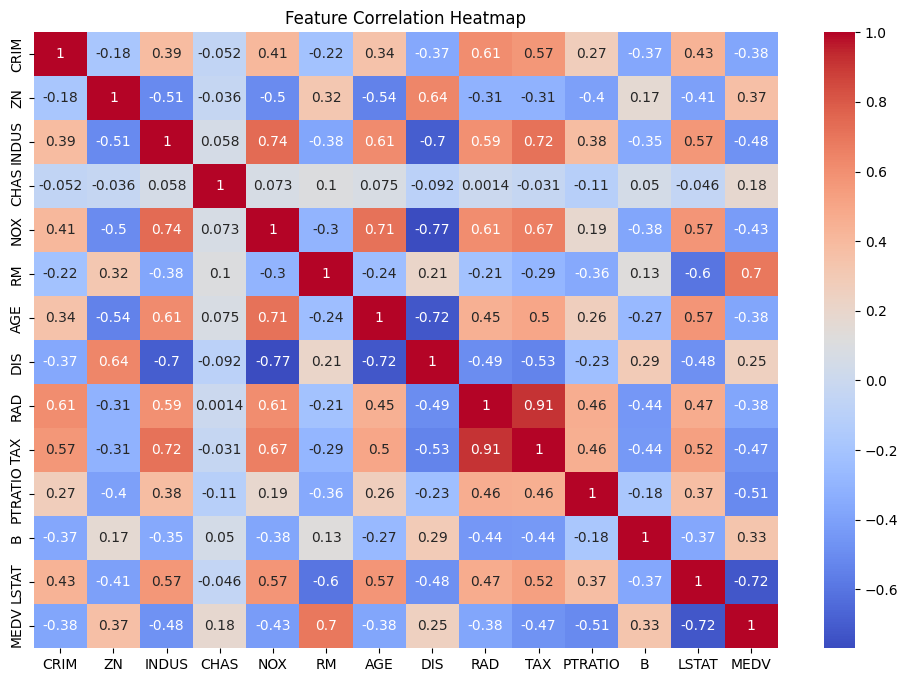

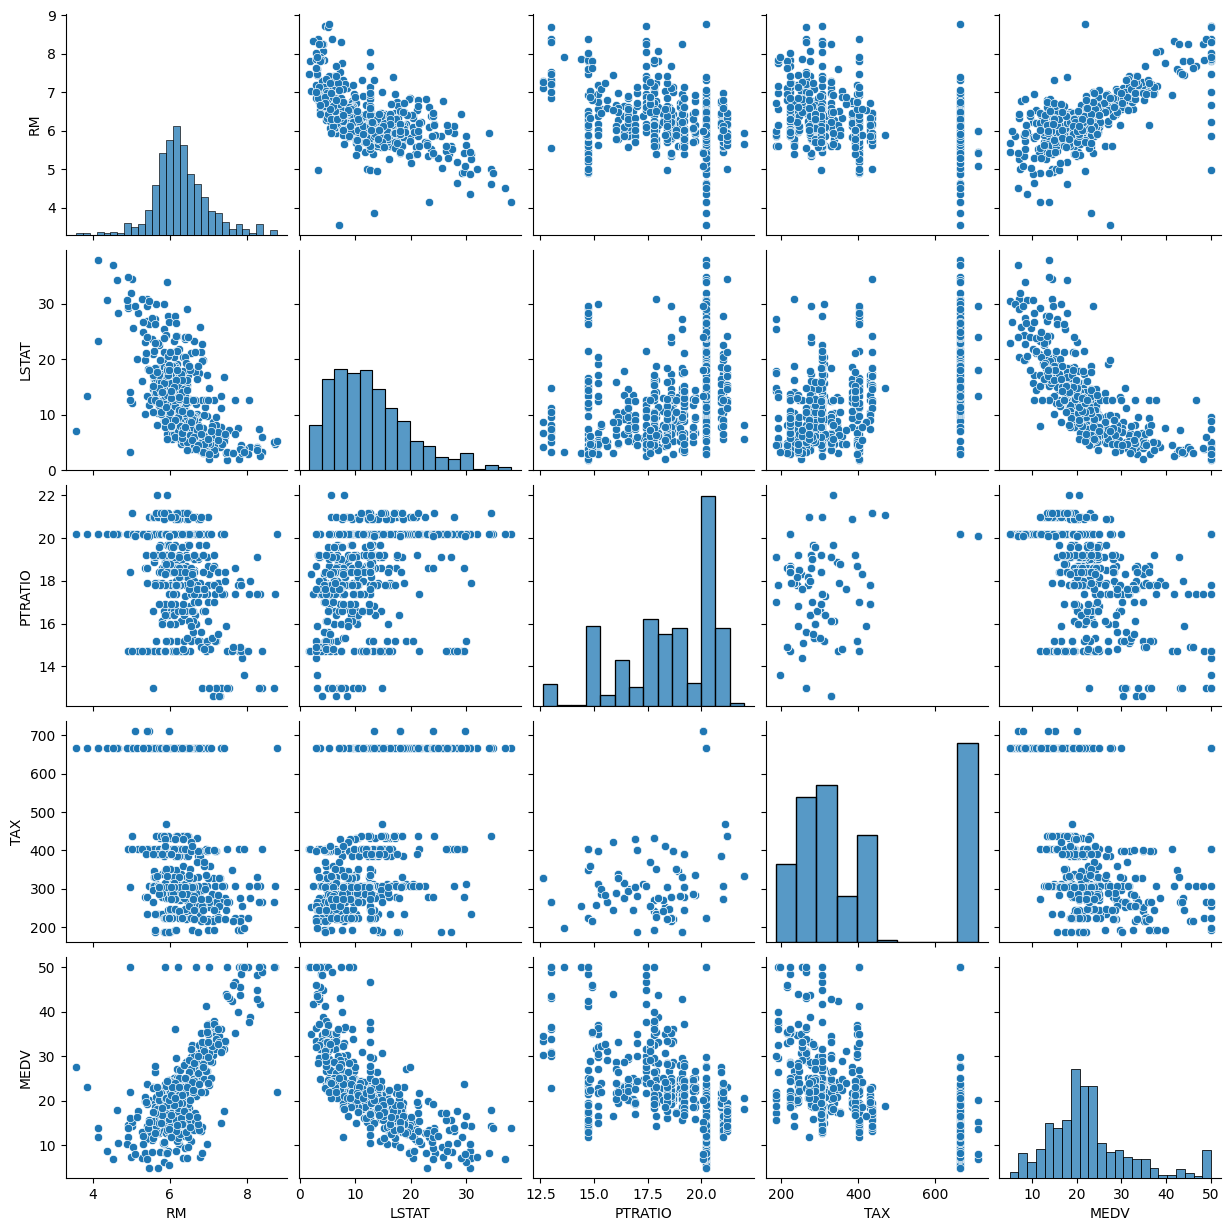


📈 Linear Regression:
MSE: 25.017672023842852
R²: 0.658852019550812


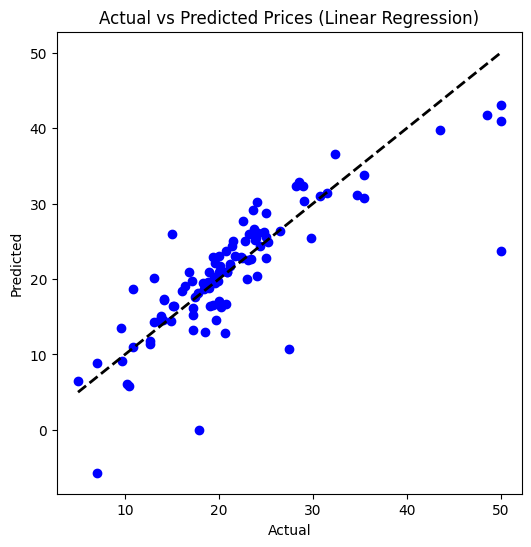


🌲 Random Forest:
MSE: 8.260524343137256
R²: 0.8873571771815177


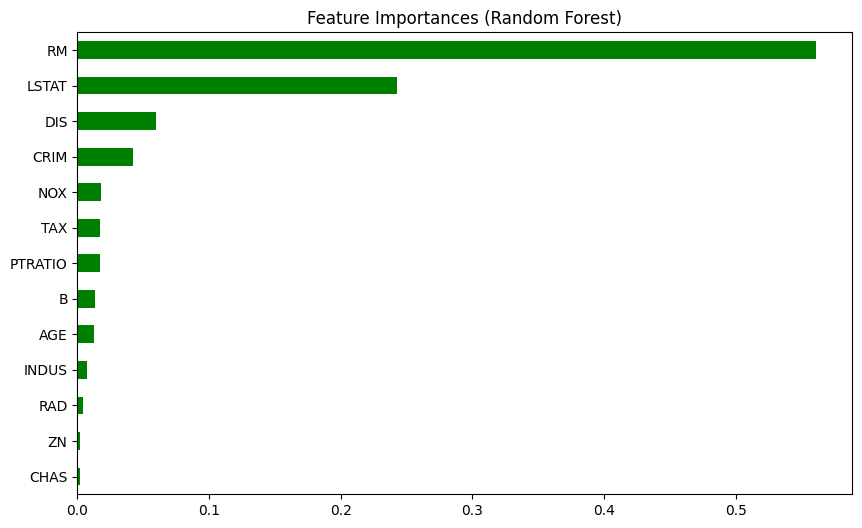


--- 🔮 Predict New House Price (Only Important Features) ---
Enter value for RM: 12
Enter value for LSTAT: 23
Enter value for PTRATIO: 34
Enter value for TAX: 45

📢 Predicted House Price:
🔹 Linear Regression: $34.66
🔹 Random Forest: $35.07


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# 📂 Load Dataset
df = pd.read_csv("BostonHousing.csv")  # Update path if needed

# ✅ Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 👁️ Basic Overview
print("🔍 Missing values (after imputation):\n", df_imputed.isnull().sum())
print("\n📋 Sample Data:")
print(df_imputed.head())

# 📊 Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_imputed.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 📈 Pairplot for important features
important_features = ['RM', 'LSTAT', 'PTRATIO', 'TAX', 'MEDV']
sns.pairplot(df_imputed[important_features])
plt.show()

# 🧹 Feature/Target split
X = df_imputed.drop('MEDV', axis=1)
y = df_imputed['MEDV']

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📏 Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🤖 Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 📊 Evaluation - Linear
print("\n📈 Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

# 🎯 Plot Actual vs Predicted (LR)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()

# 🌲 Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 📊 Evaluation - Random Forest
print("\n🌲 Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

# 🔍 Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), color='green')
plt.title("Feature Importances (Random Forest)")
plt.show()

# 🧾 Predict with user input (only important features)
print("\n--- 🔮 Predict New House Price (Only Important Features) ---")

# Only ask for top features
top_features = ['RM', 'LSTAT', 'PTRATIO', 'TAX']
mean_values = X.mean()
user_input_dict = {}

for feat in top_features:
    val = float(input(f"Enter value for {feat}: "))
    user_input_dict[feat] = val

# Build final input with means + user values
final_input = []
for feat in X.columns:
    if feat in user_input_dict:
        final_input.append(user_input_dict[feat])
    else:
        final_input.append(mean_values[feat])

# Scale and predict
user_input_arr = np.array(final_input).reshape(1, -1)
user_input_scaled = scaler.transform(user_input_arr)

lr_pred = lr.predict(user_input_scaled)[0]
rf_pred = rf.predict(user_input_scaled)[0]

print("\n📢 Predicted House Price:")
print(f"🔹 Linear Regression: ${lr_pred:.2f}")
print(f"🔹 Random Forest: ${rf_pred:.2f}")
